In [ ]:
!pip install tensorflow

### Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Data Preprocessing and Exploration

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

### Example Input

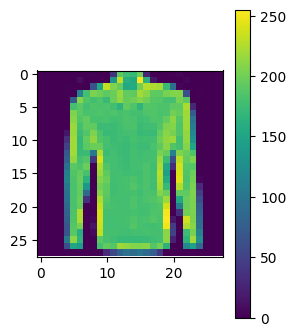

In [ ]:
plt.figure(figsize=(3,4))
plt.imshow(x_train[40])
plt.colorbar()

### Normalization : Changing Colorbar

In [ ]:
np.min(x_train),np.max(x_train)

(0, 255)

In [ ]:
np.min(x_test),np.max(x_test)

(0, 255)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [ ]:
np.min(x_test),np.max(x_test)

(0.0, 1.0)

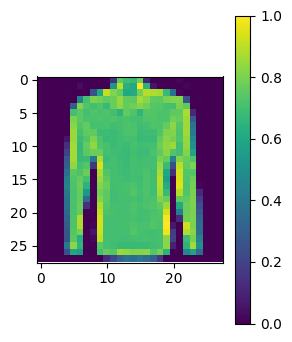

In [ ]:
plt.figure(figsize=(3,4))
plt.imshow(x_train[40])
plt.colorbar()

### Reshape dataset from 3d to 2d

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Model Building

In [ ]:
model = tf.keras.models.Sequential()

### Layer 1

In [ ]:
model.add(tf.keras.layers.Dense(units=133,activation='relu',input_shape=(784,)))

### Layer 2

In [ ]:
model.add(tf.keras.layers.Dropout(0.3))

### Layer 3

In [ ]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

### Compiling all Layers

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 133)               104405    
                                                                 
 dropout_15 (Dropout)        (None, 133)               0         
                                                                 
 dense_33 (Dense)            (None, 10)                1340      
                                                                 
Total params: 105745 (413.07 KB)
Trainable params: 105745 (413.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fitting dataset

In [ ]:
model.fit(x_train,y_train,batch_size=15,epochs=30)

Epoch 1/30
4000/4000 [==============================] - 13s 3ms/step - loss: 0.5396 - sparse_categorical_accuracy: 0.8061
Epoch 2/30
4000/4000 [==============================] - 7s 2ms/step - loss: 0.4221 - sparse_categorical_accuracy: 0.8461
Epoch 3/30
4000/4000 [==============================] - 7s 2ms/step - loss: 0.3905 - sparse_categorical_accuracy: 0.8569
Epoch 4/30
4000/4000 [==============================] - 7s 2ms/step - loss: 0.3716 - sparse_categorical_accuracy: 0.8654
Epoch 5/30
4000/4000 [==============================] - 7s 2ms/step - loss: 0.3557 - sparse_categorical_accuracy: 0.8682
Epoch 6/30
4000/4000 [==============================] - 7s 2ms/step - loss: 0.3472 - sparse_categorical_accuracy: 0.8719
Epoch 7/30
4000/4000 [==============================] - 7s 2ms/step - loss: 0.3402 - sparse_categorical_accuracy: 0.8741
Epoch 8/30
4000/4000 [==============================] - 7s 2ms/step - loss: 0.3277 - sparse_categorical_accuracy: 0.8773
Epoch 9/30
4000/4000 [=========

In [ ]:
# y_pred = model.predict_classes()
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


# Accuracy

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3685 - sparse_categorical_accuracy: 0.8822


In [ ]:
test_acc

0.8822000026702881

### Checking some values

In [ ]:
for i in range(0,5):
  print(y_pred[i],y_test[i])

9 9
2 2
1 1
1 1
6 6
